**This notebook is an exercise in the [Introduction to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/machine-learning-competitions).**

---


In [1]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex7 import *

# Set up filepaths
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 

In [6]:
# Import helpful libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load the data, and separate the target
iowa_file_path = '../input/train.csv'
home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice

In [4]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


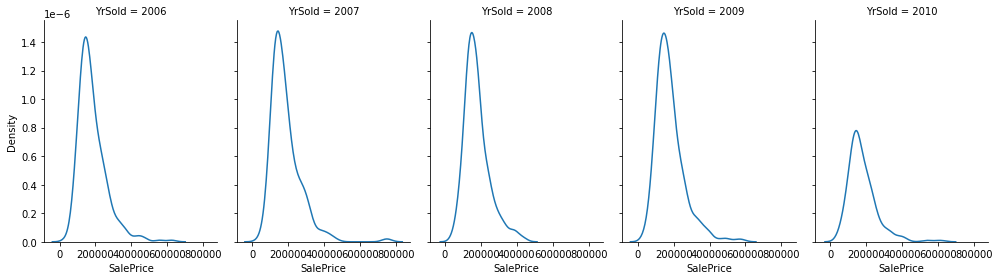

In [7]:
sns.displot(
    data=home_data, x="SalePrice", col="YrSold",
    kind="kde", height=4, aspect=.7,
)

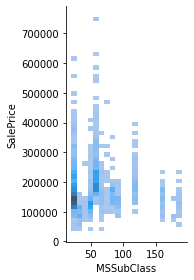

In [18]:
sns.displot(
    data=home_data, y="SalePrice", x="MSSubClass",
     height=4, aspect=.7,
)

In [82]:
# Create X (After completing the exercise, you can return to modify this line!)
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 
            'TotRmsAbvGrd', 'PoolArea', 'OverallQual', 'OverallCond', 'YrSold', 'Fireplaces', 
            'GarageArea', 'EnclosedPorch', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
            'GrLivArea', 'HalfBath']

# Select columns corresponding to features, and preview the data
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 16,784


In [61]:
rf_val_mae

16784.257680365296

In [175]:
rf_model.score(train_X, train_y)

0.973733203401936

In [83]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(random_state=1)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(X, y)

RandomForestRegressor(random_state=1)

In [155]:
# path to file you will use for predictions
test_data_path = '../input/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
test_X = test_data[features]

In [156]:
test_X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,PoolArea,OverallQual,OverallCond,YrSold,Fireplaces,GarageArea,EnclosedPorch,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,HalfBath
0,11622,1961,896,0,1,2,5,0,5,6,2010,0,730.0,0,144.0,270.0,882.0,896,896,0
1,14267,1958,1329,0,1,3,6,0,6,6,2010,0,312.0,0,0.0,406.0,1329.0,1329,1329,1
2,13830,1997,928,701,2,3,6,0,5,5,2010,1,482.0,0,0.0,137.0,928.0,928,1629,1
3,9978,1998,926,678,2,3,7,0,6,6,2010,1,470.0,0,0.0,324.0,926.0,926,1604,1
4,5005,1992,1280,0,2,2,5,0,8,5,2010,0,506.0,0,0.0,1017.0,1280.0,1280,1280,0


In [157]:
test_X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,PoolArea,OverallQual,OverallCond,YrSold,Fireplaces,GarageArea,EnclosedPorch,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,HalfBath
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1458.000000,1459.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000
mean,9819.161069,1971.357779,1156.534613,325.967786,1.570939,2.854010,6.385195,1.744345,6.078821,5.553804,2007.769705,0.58122,472.768861,24.243317,52.619342,554.294925,1046.117970,1156.534613,1486.045922,0.377656
std,4955.517327,30.390071,398.165820,420.610226,0.555190,0.829788,1.508895,30.491646,1.436812,1.113740,1.301740,0.64742,217.048611,67.227765,176.753926,437.260486,442.898624,398.165820,485.566099,0.503017
min,1470.000000,1879.000000,407.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,2006.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,407.000000,0.000000
25%,7391.000000,1953.000000,873.500000,0.000000,1.000000,2.000000,5.000000,0.000000,5.000000,5.000000,2007.000000,0.00000,318.000000,0.000000,0.000000,219.250000,784.000000,873.500000,1117.500000,0.000000
50%,9399.000000,1973.000000,1079.000000,0.000000,2.000000,3.000000,6.000000,0.000000,6.000000,5.000000,2008.000000,0.00000,480.000000,0.000000,0.000000,460.000000,988.000000,1079.000000,1432.000000,0.000000
75%,11517.500000,2001.000000,1382.500000,676.000000,2.000000,3.000000,7.000000,0.000000,7.000000,6.000000,2009.000000,1.00000,576.000000,0.000000,0.000000,797.750000,1305.000000,1382.500000,1721.000000,1.000000
max,56600.000000,2010.000000,5095.000000,1862.000000,4.000000,6.000000,15.000000,800.000000,10.000000,9.000000,2010.000000,4.00000,1488.000000,1012.000000,1526.000000,2140.000000,5095.000000,5095.000000,5095.000000,2.000000


In [104]:
test_X[test_X['GarageArea'].isnull()]

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,PoolArea,OverallQual,OverallCond,...,Fireplaces,GarageArea,EnclosedPorch,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,HalfBath,13
1116,9060,1923,942,886,2,3,6,0,5,6,...,0,NaN,212,0.0,311.0,859.0,942,1828,0,480.0


In [166]:
test_X[test_X['BsmtFinSF2'].isnull()]

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,PoolArea,OverallQual,OverallCond,YrSold,Fireplaces,GarageArea,EnclosedPorch,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,HalfBath
660,5940,1946,896,0,1,2,4,0,4,7,2008,0,280.0,0,NaN,NaN,NaN,896,896,0


In [176]:
test_X.ffill(inplace=True)

In [172]:
test_X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,PoolArea,OverallQual,OverallCond,YrSold,Fireplaces,GarageArea,EnclosedPorch,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,HalfBath
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,9819.161069,1971.357779,1156.534613,325.967786,1.570939,2.854010,6.385195,1.744345,6.078821,5.553804,2007.769705,0.58122,472.444825,24.243317,52.583276,554.255655,1045.788211,1156.534613,1486.045922,0.377656
std,4955.517327,30.390071,398.165820,420.610226,0.555190,0.829788,1.508895,30.491646,1.436812,1.113740,1.301740,0.64742,217.326902,67.227765,176.698671,437.113082,442.925845,398.165820,485.566099,0.503017
min,1470.000000,1879.000000,407.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,2006.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,407.000000,0.000000
25%,7391.000000,1953.000000,873.500000,0.000000,1.000000,2.000000,5.000000,0.000000,5.000000,5.000000,2007.000000,0.00000,317.500000,0.000000,0.000000,219.500000,784.000000,873.500000,1117.500000,0.000000
50%,9399.000000,1973.000000,1079.000000,0.000000,2.000000,3.000000,6.000000,0.000000,6.000000,5.000000,2008.000000,0.00000,480.000000,0.000000,0.000000,460.000000,988.000000,1079.000000,1432.000000,0.000000
75%,11517.500000,2001.000000,1382.500000,676.000000,2.000000,3.000000,7.000000,0.000000,7.000000,6.000000,2009.000000,1.00000,576.000000,0.000000,0.000000,797.500000,1304.000000,1382.500000,1721.000000,1.000000
max,56600.000000,2010.000000,5095.000000,1862.000000,4.000000,6.000000,15.000000,800.000000,10.000000,9.000000,2010.000000,4.00000,1488.000000,1012.000000,1526.000000,2140.000000,5095.000000,5095.000000,5095.000000,2.000000


In [173]:
test_preds = rf_model_on_full_data.predict(test_X)

In [177]:
output = pd.DataFrame({'Id': test_data.Id,'SalePrice': test_preds})
output.to_csv('submission2.csv', index=False)

---




*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum/161285) to chat with other Learners.*